In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.io.sql as pd_sql
import sqlite3 as sql
import pickle
import requests
import time

from pandas.tools.plotting import scatter_matrix

from sklearn import cross_validation as cv
from sklearn.cross_validation import train_test_split as tts

from sklearn.linear_model import Ridge
from sklearn.linear_model import RandomizedLasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
%matplotlib inline

In [2]:
#create DB file
con = sql.connect("educationdata5.db") 

In [3]:
# Load frame
df = pd.read_csv('../Documents/Cleaned-DatatoLoad-DoE-v2 20160511.csv')

In [4]:
# See Data
df.head()

,UNITID,OPEID,OPEID6,INSTNM,GRAD_DEBT_MDN2013,STABBR,CONTROL_code,CONTROL,region_code,region,...,GRAD_DEBT_MDN_2003,GRAD_DEBT_MDN_2005,GRAD_DEBT_MDN_2007,GRAD_DEBT_MDN_2009,GRAD_DEBT_MDN_2011,DtoE2003,DtoE2005,DtoE2007,DtoE2009,DtoE2011
0,100654,100200,1002,Alabama A & M University,33611.5,AL,1,Public,5,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",...,19500,22802.5,21750,26477,29573,0.686620,0.887257,0.833333,1.059080,1.297061
1,101189,100300,1003,Faulkner University,23750.0,AL,2,Private nonProfit,5,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",...,NaN,NaN,NaN,22250,22250,NaN,NaN,NaN,0.662202,0.729508
2,101709,100400,1004,University of Montevallo,23400.0,AL,1,Public,5,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",...,14250,14565.5,16000,18250,21500,0.476589,0.480710,0.504732,0.644876,0.817490
3,100724,100500,1005,Alabama State University,33452.0,AL,1,Public,5,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",...,21750,23776.0,27569,29433,31000,0.906250,1.052035,1.163249,1.428786,1.606218
4,100760,100700,1007,Central Alabama Community College,NaN,AL,1,Public,5,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",...,4293,7500.0,8750,12651,NaN,0.185043,0.326087,0.352823,0.540641,NaN


In [6]:
#stats for data frame
df.describe(percentiles=None, include=None, exclude=None)

,UNITID,OPEID,OPEID6,GRAD_DEBT_MDN2013,CONTROL_code,region_code,SAT_AVG,"Agriculture, Agriculture Operations, And Related Sciences",Natural Resources And Conservation,Architecture And Related Services,...,GRAD_DEBT_MDN_2003,GRAD_DEBT_MDN_2005,GRAD_DEBT_MDN_2007,GRAD_DEBT_MDN_2009,GRAD_DEBT_MDN_2011,DtoE2003,DtoE2005,DtoE2007,DtoE2009,DtoE2011
count,5681.000000,5681.000000,5681.000000,4321.000000,5681.000000,5681.00000,1370.000000,5679.000000,5679.000000,5679.000000,...,3169.000000,3474.000000,3648.000000,3901.000000,4194.000000,2862.000000,3137.000000,3303.000000,3483.000000,3630.000000
mean,260427.135716,1632911.283225,16329.112832,16249.547790,2.036261,4.55272,1058.926277,0.036098,0.127135,0.036978,...,10680.668823,11042.112263,11585.734649,13447.358754,15288.125894,0.350889,0.370597,0.394649,0.489258,0.592513
std,638462.673254,1454148.782373,14541.487824,8112.294606,0.834398,2.19997,132.780309,0.199330,0.343051,0.193335,...,5561.190788,5703.221287,5714.863986,6237.537355,7534.722970,0.167850,0.174019,0.180691,0.229584,0.282406
min,100654.000000,100200.000000,1002.000000,1270.000000,1.000000,0.00000,666.000000,0.000000,0.000000,0.000000,...,1082.000000,654.000000,1112.000000,900.000000,1144.000000,0.041456,0.046714,0.065955,0.012363,0.023952
25%,159601.000000,314200.000000,3142.000000,9500.000000,1.000000,3.00000,974.000000,0.000000,0.000000,0.000000,...,5825.000000,6125.000000,6625.000000,8211.500000,9409.250000,0.214655,0.233958,0.260273,0.334507,0.393416
50%,206358.000000,999400.000000,9994.000000,13994.000000,2.000000,5.00000,1041.000000,0.000000,0.000000,0.000000,...,10348.000000,10213.500000,10684.250000,12376.000000,13405.000000,0.336027,0.350245,0.372083,0.456985,0.553968
75%,377759.000000,3011800.000000,30118.000000,23750.000000,3.000000,6.00000,1121.750000,0.000000,0.000000,0.000000,...,15824.000000,16425.875000,17000.000000,18500.000000,21930.250000,0.451278,0.472384,0.488576,0.590278,0.737073
max,45897305.000000,10732900.000000,107329.000000,53831.500000,3.000000,9.00000,1534.000000,2.000000,2.000000,2.000000,...,39000.000000,34285.000000,37375.000000,41249.000000,47186.500000,1.459062,1.510352,1.697049,2.223247,2.325581


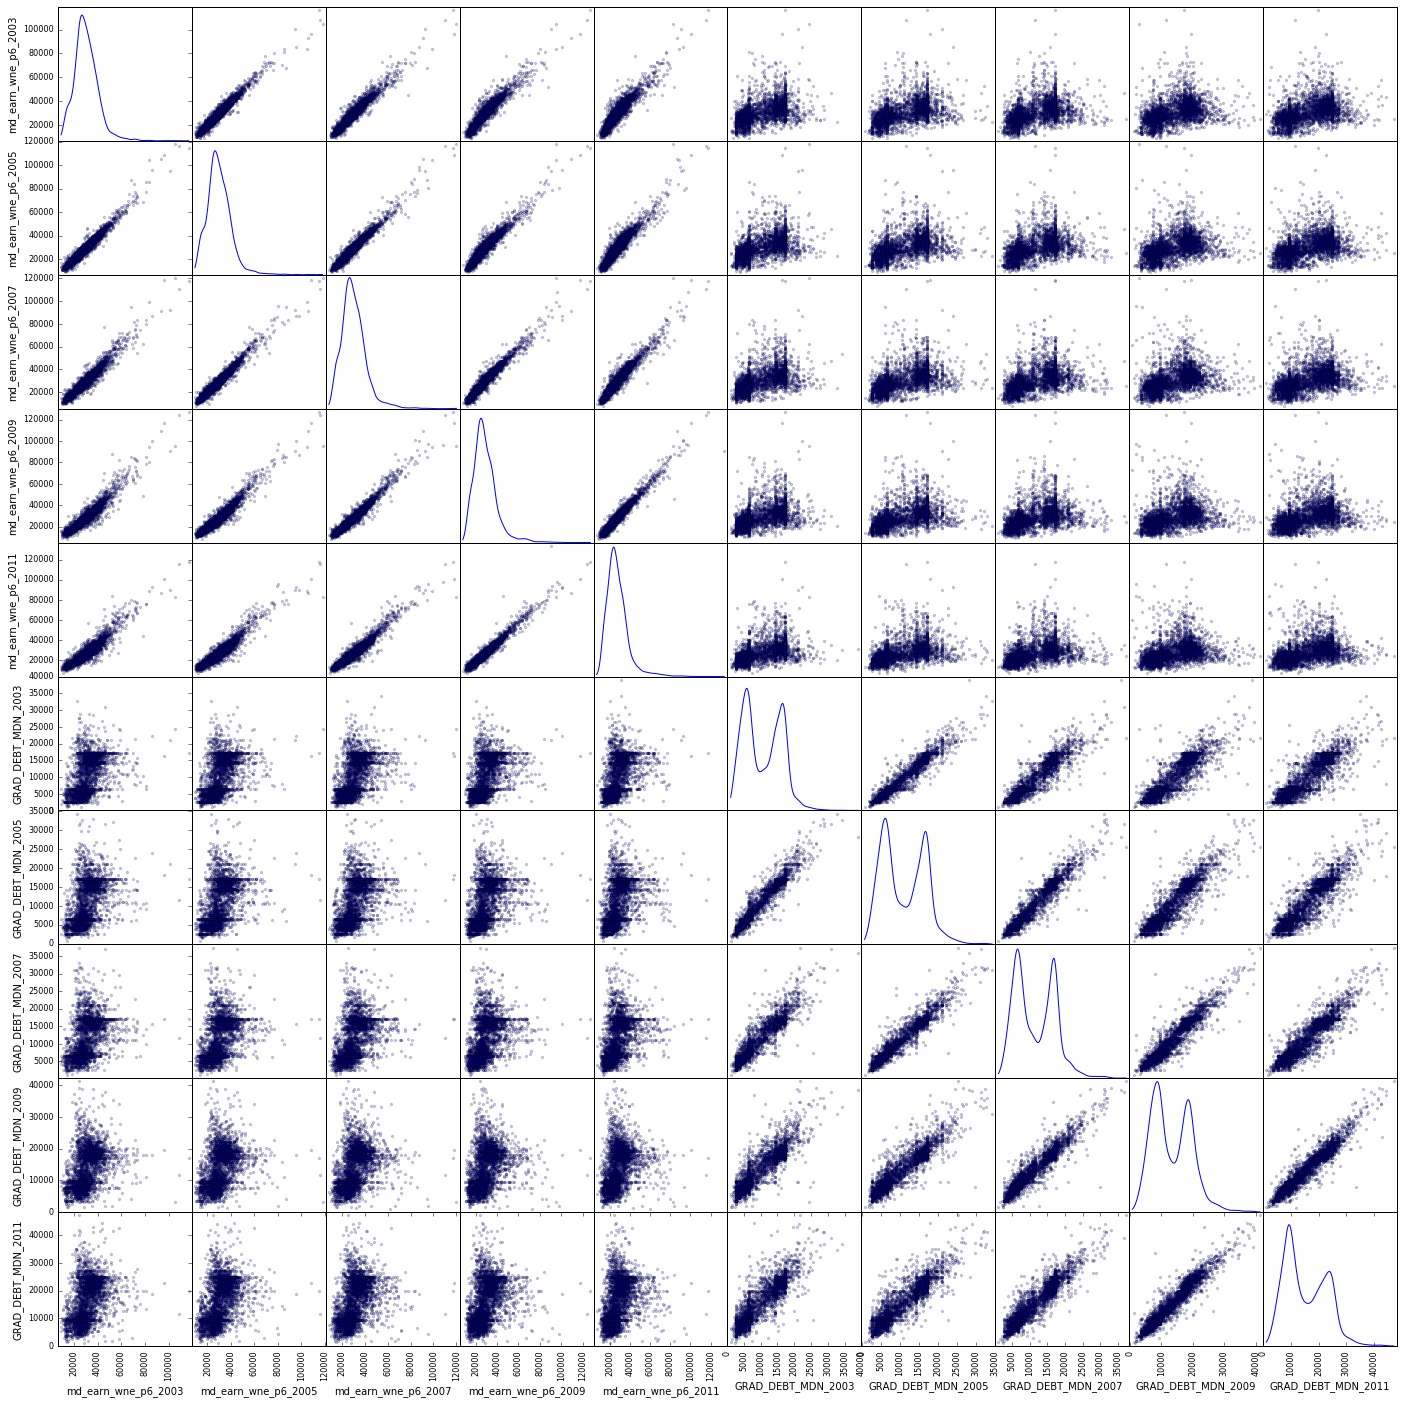

In [7]:
#scatter plot of Debts & Earnings (2003-2011)
scatter_matrix(df.ix[:,-15:-5], alpha=0.2, figsize=(24,24), diagonal='kde')
plt.show()

In [8]:
#null values in Earnings Variables
df.md_earn_wne_p6_2003.isnull().sum()

2030

In [9]:
#Replace null with mean values for 2003
mean = df['md_earn_wne_p6_2003'].mean()
df['md_earn_wne_p6_2003'].fillna(mean, inplace=True)
df['md_earn_wne_p6_2003'].tail(10)

5671    30512.736237
5672    30512.736237
5673    30512.736237
5674    30512.736237
5675    30512.736237
5676    30512.736237
5677    30512.736237
5678    30512.736237
5679    30512.736237
5680    30512.736237
Name: md_earn_wne_p6_2003, dtype: float64

In [10]:
#Replace null with mean values for 2005
mean = df['md_earn_wne_p6_2005'].mean()
df['md_earn_wne_p6_2005'].fillna(mean, inplace=True)

In [11]:
#Replace null with mean values for 2007
mean = df['md_earn_wne_p6_2007'].mean()
df['md_earn_wne_p6_2007'].fillna(mean, inplace=True)

In [12]:
#Replace null with mean values for 2009
mean = df['md_earn_wne_p6_2009'].mean()
df['md_earn_wne_p6_2009'].fillna(mean, inplace=True)

In [13]:
#Replace null with mean values for 2011
mean = df['md_earn_wne_p6_2011'].mean()
df['md_earn_wne_p6_2011'].fillna(mean, inplace=True)

In [14]:
#setting earnings features (2003-2009)
Earnings_features = df.ix[:,-15:-11]
Earnings_features.head()

,md_earn_wne_p6_2003,md_earn_wne_p6_2005,md_earn_wne_p6_2007,md_earn_wne_p6_2009
0,28400,25700,26100,25000
1,31300,35000,34400,33600
2,29900,30300,31700,28300
3,24000,22600,23700,20600
4,23200,23000,24800,23400


In [15]:
#setting earnings label (2011)
Earnings_labels = df.ix[:,54]
Earnings_labels.head()

0    22800
1    30500
2    26300
3    19300
4    22700
Name: md_earn_wne_p6_2011, dtype: float64

In [16]:
#Set splits and evaluate models
splits = cv.train_test_split(Earnings_features, Earnings_labels, test_size=0.2)
X_train, X_test, y_train, y_test = splits

In [17]:
#Ridge
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print "Ridge Regression model"
print "Mean Absolute Error: %0.3f" % mae(expected, predicted)
print "Coefficient of Determination: %0.3f" % r2_score(expected, predicted)

Ridge Regression model
Mean Absolute Error: 1686.787
Coefficient of Determination: 0.884


In [18]:
#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print "Linear Regression model"
print "Mean Absolute Error: %0.3f" % mae(expected, predicted)
print "Coefficient of Determination: %0.3f" % r2_score(expected, predicted)

Linear Regression model
Mean Absolute Error: 1686.787
Coefficient of Determination: 0.884


In [19]:
#Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print "Random Forest model"
print "Mean absolute error = %0.3f" % mae(expected, predicted)
print "R2 score = %0.3f" % r2_score(expected, predicted)

Random Forest model
Mean absolute error = 1970.569
R2 score = 0.864


In [20]:
model = BayesianRidge()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print "Bayesian"
print "Mean absolute error = %0.3f" % mae(expected, predicted)
print "R2 score = %0.3f" % r2_score(expected, predicted)

Bayesian
Mean absolute error = 1687.065
R2 score = 0.884


In [21]:
#For Earnings forecast let's use Linear Regression
#Forecasting 2011 to compare with 2011 Actuals and get error graph
model = LinearRegression()
model.fit(X_train, y_train)
expected = y_test
predicted = model.predict(X_test)
Earnings_predicted_2011 = model.predict(Earnings_features)

In [22]:
Earnings_features["md_earn_wne_p6_2011_new"] = Earnings_predicted_2011
Earnings_features.head()

,md_earn_wne_p6_2003,md_earn_wne_p6_2005,md_earn_wne_p6_2007,md_earn_wne_p6_2009,md_earn_wne_p6_2011_new
0,28400,25700,26100,25000,23745.667926
1,31300,35000,34400,33600,31700.719257
2,29900,30300,31700,28300,27330.409815
3,24000,22600,23700,20600,20128.616371
4,23200,23000,24800,23400,22310.666347


In [23]:
#get file to analyze 2011 actuals vs. predicted
Earnings_features.to_csv('earnings-file-2011-new.csv', index=False)

In [24]:
#set 2005-2011 actuals earnings frame
Earnings_features = df.ix[:,-14:-10]
Earnings_features.head()

,md_earn_wne_p6_2005,md_earn_wne_p6_2007,md_earn_wne_p6_2009,md_earn_wne_p6_2011
0,25700,26100,25000,22800
1,35000,34400,33600,30500
2,30300,31700,28300,26300
3,22600,23700,20600,19300
4,23000,24800,23400,22700


In [25]:
#Forecasting 2013 Earnings
model = LinearRegression()
model.fit(X_train, y_train)
expected = y_test
predicted = model.predict(X_test)
Earnings_predicted_2013 = model.predict(Earnings_features)

In [26]:
#2013 Earnings
Earnings_features["md_earn_wne_p6_2013"] = Earnings_predicted_2013
Earnings_features.head()

,md_earn_wne_p6_2005,md_earn_wne_p6_2007,md_earn_wne_p6_2009,md_earn_wne_p6_2011,md_earn_wne_p6_2013
0,25700,26100,25000,22800,22023.973675
1,35000,34400,33600,30500,29350.823929
2,30300,31700,28300,26300,25285.304044
3,22600,23700,20600,19300,18630.095785
4,23000,24800,23400,22700,21595.749782


In [27]:
Earnings_features2 = Earnings_features.ix[:,1:5]
Earnings_features2.head()

,md_earn_wne_p6_2007,md_earn_wne_p6_2009,md_earn_wne_p6_2011,md_earn_wne_p6_2013
0,26100,25000,22800,22023.973675
1,34400,33600,30500,29350.823929
2,31700,28300,26300,25285.304044
3,23700,20600,19300,18630.095785
4,24800,23400,22700,21595.749782


In [28]:
#Forecasting 2015 Earnings
model = LinearRegression()
model.fit(X_train, y_train)
expected = y_test
predicted = model.predict(X_test)
Earnings_predicted_2015 = model.predict(Earnings_features2)

In [29]:
Earnings_features2["md_earn_wne_p6_2015"] = Earnings_predicted_2015
Earnings_features2.head()

,md_earn_wne_p6_2007,md_earn_wne_p6_2009,md_earn_wne_p6_2011,md_earn_wne_p6_2013,md_earn_wne_p6_2015
0,26100,25000,22800,22023.973675,20993.067741
1,34400,33600,30500,29350.823929,27890.480832
2,31700,28300,26300,25285.304044,24050.581239
3,23700,20600,19300,18630.095785,17790.413399
4,24800,23400,22700,21595.749782,20631.425559


In [30]:
Earnings_features3 = Earnings_features2.ix[:,1:6]
Earnings_features3.head()

,md_earn_wne_p6_2009,md_earn_wne_p6_2011,md_earn_wne_p6_2013,md_earn_wne_p6_2015
0,25000,22800,22023.973675,20993.067741
1,33600,30500,29350.823929,27890.480832
2,28300,26300,25285.304044,24050.581239
3,20600,19300,18630.095785,17790.413399
4,23400,22700,21595.749782,20631.425559


In [31]:
#Forecasting 2017 Earnings
model = LinearRegression()
model.fit(X_train, y_train)
expected = y_test
predicted = model.predict(X_test)
Earnings_predicted_2017 = model.predict(Earnings_features3)

In [32]:
Earnings_features3["md_earn_wne_p6_2017"] = Earnings_predicted_2017
Earnings_features3.head()

,md_earn_wne_p6_2009,md_earn_wne_p6_2011,md_earn_wne_p6_2013,md_earn_wne_p6_2015,md_earn_wne_p6_2017
0,25000,22800,22023.973675,20993.067741,20053.812722
1,33600,30500,29350.823929,27890.480832,26545.948426
2,28300,26300,25285.304044,24050.581239,22940.120897
3,20600,19300,18630.095785,17790.413399,17045.737482
4,23400,22700,21595.749782,20631.425559,19720.517835


In [33]:
Earnings_features4 = Earnings_features3.ix[:,1:7]
Earnings_features4.head()

,md_earn_wne_p6_2011,md_earn_wne_p6_2013,md_earn_wne_p6_2015,md_earn_wne_p6_2017
0,22800,22023.973675,20993.067741,20053.812722
1,30500,29350.823929,27890.480832,26545.948426
2,26300,25285.304044,24050.581239,22940.120897
3,19300,18630.095785,17790.413399,17045.737482
4,22700,21595.749782,20631.425559,19720.517835


In [34]:
#Forecasting 2019 Earnings
model = LinearRegression()
model.fit(X_train, y_train)
expected = y_test
predicted = model.predict(X_test)
Earnings_predicted_2019 = model.predict(Earnings_features4)

In [35]:
Earnings_features4["md_earn_wne_p6_2019"] = Earnings_predicted_2019
Earnings_features4.head()

,md_earn_wne_p6_2011,md_earn_wne_p6_2013,md_earn_wne_p6_2015,md_earn_wne_p6_2017,md_earn_wne_p6_2019
0,22800,22023.973675,20993.067741,20053.812722,19177.423560
1,30500,29350.823929,27890.480832,26545.948426,25293.081705
2,26300,25285.304044,24050.581239,22940.120897,21894.195806
3,19300,18630.095785,17790.413399,17045.737482,16342.031520
4,22700,21595.749782,20631.425559,19720.517835,18858.563196


In [36]:
Earnings_features5 = Earnings_features4.ix[:,1:5]
Earnings_features5.head()

,md_earn_wne_p6_2013,md_earn_wne_p6_2015,md_earn_wne_p6_2017,md_earn_wne_p6_2019
0,22023.973675,20993.067741,20053.812722,19177.423560
1,29350.823929,27890.480832,26545.948426,25293.081705
2,25285.304044,24050.581239,22940.120897,21894.195806
3,18630.095785,17790.413399,17045.737482,16342.031520
4,21595.749782,20631.425559,19720.517835,18858.563196


In [37]:
#Forecasting 2021 Earnings 
model = LinearRegression()
model.fit(X_train, y_train)
expected = y_test
predicted = model.predict(X_test)
Earnings_predicted_2021 = model.predict(Earnings_features5)

In [38]:
Earnings_features5["md_earn_wne_p6_2021"] = Earnings_predicted_2021
Earnings_features5.head()

,md_earn_wne_p6_2013,md_earn_wne_p6_2015,md_earn_wne_p6_2017,md_earn_wne_p6_2019,md_earn_wne_p6_2021
0,22023.973675,20993.067741,20053.812722,19177.423560,18347.344608
1,29350.823929,27890.480832,26545.948426,25293.081705,24106.703365
2,25285.304044,24050.581239,22940.120897,21894.195806,20906.064195
3,18630.095785,17790.413399,17045.737482,16342.031520,15677.355872
4,21595.749782,20631.425559,19720.517835,18858.563196,18048.329102


In [39]:
#Get Earnings forecasts 2013-2021
Earnings_features5.to_csv('earnings-file-predictions.csv', index=False)

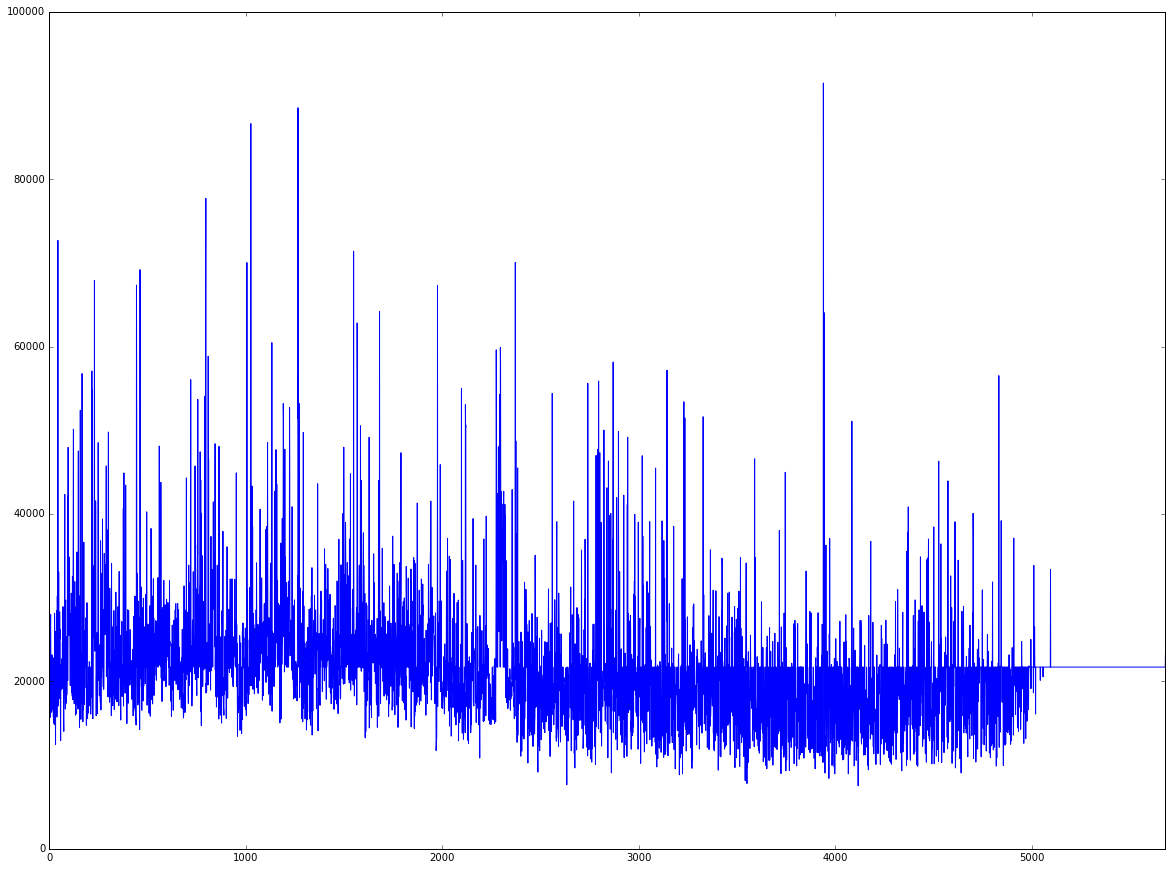

In [40]:
#plot 2021 Earnings
Earnings_features5["md_earn_wne_p6_2021"].plot(figsize=(20,15));

In [41]:
#null values in 2003 Debt Variables
df.GRAD_DEBT_MDN_2003.isnull().sum()

2512

In [42]:
#Replace null with mean values for 2003 Debt
mean = df['GRAD_DEBT_MDN_2003'].mean()
df['GRAD_DEBT_MDN_2003'].fillna(mean, inplace=True)
df['GRAD_DEBT_MDN_2003'].tail(10)

5671    10680.668823
5672    10680.668823
5673    10680.668823
5674    10680.668823
5675    10680.668823
5676    10680.668823
5677    10680.668823
5678    10680.668823
5679    10680.668823
5680    10680.668823
Name: GRAD_DEBT_MDN_2003, dtype: float64

In [43]:
#Replace null with mean values for 2005-2011 Debt variables
mean = df['GRAD_DEBT_MDN_2005'].mean()
df['GRAD_DEBT_MDN_2005'].fillna(mean, inplace=True)
mean = df['GRAD_DEBT_MDN_2007'].mean()
df['GRAD_DEBT_MDN_2007'].fillna(mean, inplace=True)
mean = df['GRAD_DEBT_MDN_2009'].mean()
df['GRAD_DEBT_MDN_2009'].fillna(mean, inplace=True)
mean = df['GRAD_DEBT_MDN_2011'].mean()
df['GRAD_DEBT_MDN_2011'].fillna(mean, inplace=True)

In [44]:
df['GRAD_DEBT_MDN_2011'].tail(10)

5671    15288.125894
5672    15288.125894
5673    15288.125894
5674    15288.125894
5675    15288.125894
5676    15288.125894
5677    15288.125894
5678    15288.125894
5679    15288.125894
5680    12500.000000
Name: GRAD_DEBT_MDN_2011, dtype: float64

In [45]:
#setting Debt features (2003-2009)
Debt_features = df.ix[:,-10:-6]
Debt_features.head()

,GRAD_DEBT_MDN_2003,GRAD_DEBT_MDN_2005,GRAD_DEBT_MDN_2007,GRAD_DEBT_MDN_2009
0,19500.000000,22802.500000,21750.000000,26477
1,10680.668823,11042.112263,11585.734649,22250
2,14250.000000,14565.500000,16000.000000,18250
3,21750.000000,23776.000000,27569.000000,29433
4,4293.000000,7500.000000,8750.000000,12651


In [46]:
#setting Debt label (2011)
Debt_labels = df.ix[:,59]
Debt_labels.head()

0    29573.000000
1    22250.000000
2    21500.000000
3    31000.000000
4    15288.125894
Name: GRAD_DEBT_MDN_2011, dtype: float64

In [47]:
#Set splits and evaluate models for Debt
splits = cv.train_test_split(Debt_features, Debt_labels, test_size=0.2)
X_train, X_test, y_train, y_test = splits

In [48]:
#Ridge
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print "Ridge Regression model"
print "Mean Absolute Error: %0.3f" % mae(expected, predicted)
print "Coefficient of Determination: %0.3f" % r2_score(expected, predicted)

Ridge Regression model
Mean Absolute Error: 1684.881
Coefficient of Determination: 0.808


In [49]:
#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print "Linear Regression model"
print "Mean Absolute Error: %0.3f" % mae(expected, predicted)
print "Coefficient of Determination: %0.3f" % r2_score(expected, predicted)

Linear Regression model
Mean Absolute Error: 1684.881
Coefficient of Determination: 0.808


In [50]:
#Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print "Random Forest model"
print "Mean absolute error = %0.3f" % mae(expected, predicted)
print "R2 score = %0.3f" % r2_score(expected, predicted)

Random Forest model
Mean absolute error = 1927.507
R2 score = 0.799


In [51]:
#Bayesian
model = BayesianRidge()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print "Bayesian"
print "Mean absolute error = %0.3f" % mae(expected, predicted)
print "R2 score = %0.3f" % r2_score(expected, predicted)

Bayesian
Mean absolute error = 1685.163
R2 score = 0.808


In [52]:
#For Debt forecast let's use Linear Regression 
#Forecasting 2011 to compare with 2011 Actuals and get error graph
model = LinearRegression()
model.fit(X_train, y_train)
expected = y_test
predicted = model.predict(X_test)
Debt_predicted_2011 = model.predict(Debt_features)

In [53]:
Debt_features["GRAD_DEBT_MDN_2011_NEW"] = Debt_predicted_2011
Debt_features.head()

,GRAD_DEBT_MDN_2003,GRAD_DEBT_MDN_2005,GRAD_DEBT_MDN_2007,GRAD_DEBT_MDN_2009,GRAD_DEBT_MDN_2011_NEW
0,19500.000000,22802.500000,21750.000000,26477,30050.528646
1,10680.668823,11042.112263,11585.734649,22250,22589.724806
2,14250.000000,14565.500000,16000.000000,18250,20792.819489
3,21750.000000,23776.000000,27569.000000,29433,33886.076244
4,4293.000000,7500.000000,8750.000000,12651,13150.933622


In [54]:
#get file to analyze Debt 2011 actuals vs. predicted
Debt_features.to_csv('Debt-file-2011-new.csv', index=False)

In [55]:
#set 2003-2011 actuals Debt frame
Debt_features = df.ix[:,-9:-5]
Debt_features.head()

,GRAD_DEBT_MDN_2005,GRAD_DEBT_MDN_2007,GRAD_DEBT_MDN_2009,GRAD_DEBT_MDN_2011
0,22802.500000,21750.000000,26477,29573.000000
1,11042.112263,11585.734649,22250,22250.000000
2,14565.500000,16000.000000,18250,21500.000000
3,23776.000000,27569.000000,29433,31000.000000
4,7500.000000,8750.000000,12651,15288.125894


In [56]:
#Forecasting 2013 Debt
model = LinearRegression()
model.fit(X_train, y_train)
expected = y_test
predicted = model.predict(X_test)
Debt_predicted_2013 = model.predict(Debt_features)

In [57]:
#2013 Earnings
Debt_features["GRAD_DEBT_MDN_2013"] = Debt_predicted_2013
Debt_features.head()

,GRAD_DEBT_MDN_2005,GRAD_DEBT_MDN_2007,GRAD_DEBT_MDN_2009,GRAD_DEBT_MDN_2011,GRAD_DEBT_MDN_2013
0,22802.500000,21750.000000,26477,29573.000000,33669.460567
1,11042.112263,11585.734649,22250,22250.000000,24658.398692
2,14565.500000,16000.000000,18250,21500.000000,24090.922367
3,23776.000000,27569.000000,29433,31000.000000,36127.039414
4,7500.000000,8750.000000,12651,15288.125894,16481.160248


In [58]:
Debt_features2 = Debt_features.ix[:,1:5]
Debt_features2.head()

,GRAD_DEBT_MDN_2007,GRAD_DEBT_MDN_2009,GRAD_DEBT_MDN_2011,GRAD_DEBT_MDN_2013
0,21750.000000,26477,29573.000000,33669.460567
1,11585.734649,22250,22250.000000,24658.398692
2,16000.000000,18250,21500.000000,24090.922367
3,27569.000000,29433,31000.000000,36127.039414
4,8750.000000,12651,15288.125894,16481.160248


In [59]:
#Forecasting 2015 Debt
model = LinearRegression()
model.fit(X_train, y_train)
expected = y_test
predicted = model.predict(X_test)
Debt_predicted_2015 = model.predict(Debt_features2)

In [60]:
#2015 Debt
Debt_features2["GRAD_DEBT_MDN_2015"] = Debt_predicted_2015
Debt_features2.head()

,GRAD_DEBT_MDN_2007,GRAD_DEBT_MDN_2009,GRAD_DEBT_MDN_2011,GRAD_DEBT_MDN_2013,GRAD_DEBT_MDN_2015
0,21750.000000,26477,29573.000000,33669.460567,38068.274043
1,11585.734649,22250,22250.000000,24658.398692,27877.251227
2,16000.000000,18250,21500.000000,24090.922367,27216.106079
3,27569.000000,29433,31000.000000,36127.039414,41208.713361
4,8750.000000,12651,15288.125894,16481.160248,18498.859058


In [67]:
Debt_features3 = Debt_features2.ix[:,1:6]
Debt_features3.head()

,GRAD_DEBT_MDN_2009,GRAD_DEBT_MDN_2011,GRAD_DEBT_MDN_2013,GRAD_DEBT_MDN_2015
0,26477,29573.000000,33669.460567,38068.274043
1,22250,22250.000000,24658.398692,27877.251227
2,18250,21500.000000,24090.922367,27216.106079
3,29433,31000.000000,36127.039414,41208.713361
4,12651,15288.125894,16481.160248,18498.859058


In [68]:
#Forecasting 2017 Debt
model = LinearRegression()
model.fit(X_train, y_train)
expected = y_test
predicted = model.predict(X_test)
Debt_predicted_2017 = model.predict(Debt_features3)

In [70]:
#2017 Debt
Debt_features3["GRAD_DEBT_MDN_2017"] = Debt_predicted_2017
Debt_features3.head()

,GRAD_DEBT_MDN_2009,GRAD_DEBT_MDN_2011,GRAD_DEBT_MDN_2013,GRAD_DEBT_MDN_2015,GRAD_DEBT_MDN_2017
0,26477,29573.000000,33669.460567,38068.274043,43232.769330
1,22250,22250.000000,24658.398692,27877.251227,31932.347896
2,18250,21500.000000,24090.922367,27216.106079,30844.051049
3,29433,31000.000000,36127.039414,41208.713361,46710.193806
4,12651,15288.125894,16481.160248,18498.859058,21027.122735


In [71]:
Debt_features4 = Debt_features3.ix[:,1:7]
Debt_features4.head()

,GRAD_DEBT_MDN_2011,GRAD_DEBT_MDN_2013,GRAD_DEBT_MDN_2015,GRAD_DEBT_MDN_2017
0,29573.000000,33669.460567,38068.274043,43232.769330
1,22250.000000,24658.398692,27877.251227,31932.347896
2,21500.000000,24090.922367,27216.106079,30844.051049
3,31000.000000,36127.039414,41208.713361,46710.193806
4,15288.125894,16481.160248,18498.859058,21027.122735


In [72]:
#Forecasting 2019 Debt
model = LinearRegression()
model.fit(X_train, y_train)
expected = y_test
predicted = model.predict(X_test)
Debt_predicted_2019 = model.predict(Debt_features4)

In [73]:
#2019 Debt
Debt_features4["GRAD_DEBT_MDN_2019"] = Debt_predicted_2019
Debt_features4.head()

,GRAD_DEBT_MDN_2011,GRAD_DEBT_MDN_2013,GRAD_DEBT_MDN_2015,GRAD_DEBT_MDN_2017,GRAD_DEBT_MDN_2019
0,29573.000000,33669.460567,38068.274043,43232.769330,49054.795130
1,22250.000000,24658.398692,27877.251227,31932.347896,36157.151683
2,21500.000000,24090.922367,27216.106079,30844.051049,35003.526478
3,31000.000000,36127.039414,41208.713361,46710.193806,52917.056280
4,15288.125894,16481.160248,18498.859058,21027.122735,23861.473324


In [74]:
Debt_features5 = Debt_features4.ix[:,1:8]
Debt_features5.head()

,GRAD_DEBT_MDN_2013,GRAD_DEBT_MDN_2015,GRAD_DEBT_MDN_2017,GRAD_DEBT_MDN_2019
0,33669.460567,38068.274043,43232.769330,49054.795130
1,24658.398692,27877.251227,31932.347896,36157.151683
2,24090.922367,27216.106079,30844.051049,35003.526478
3,36127.039414,41208.713361,46710.193806,52917.056280
4,16481.160248,18498.859058,21027.122735,23861.473324


In [75]:
#Forecasting 2021 Debt
model = LinearRegression()
model.fit(X_train, y_train)
expected = y_test
predicted = model.predict(X_test)
Debt_predicted_2021 = model.predict(Debt_features5)

In [76]:
#2021 Debt
Debt_features5["GRAD_DEBT_MDN_2021"] = Debt_predicted_2021
Debt_features5.head()

,GRAD_DEBT_MDN_2013,GRAD_DEBT_MDN_2015,GRAD_DEBT_MDN_2017,GRAD_DEBT_MDN_2019,GRAD_DEBT_MDN_2021
0,33669.460567,38068.274043,43232.769330,49054.795130,55685.456277
1,24658.398692,27877.251227,31932.347896,36157.151683,40979.007105
2,24090.922367,27216.106079,30844.051049,35003.526478,39697.779483
3,36127.039414,41208.713361,46710.193806,52917.056280,60095.251810
4,16481.160248,18498.859058,21027.122735,23861.473324,27007.910279


In [77]:
#Get Debt forecasts 2013-2021
Debt_features5.to_csv('Debt-file-predictions.csv', index=False)

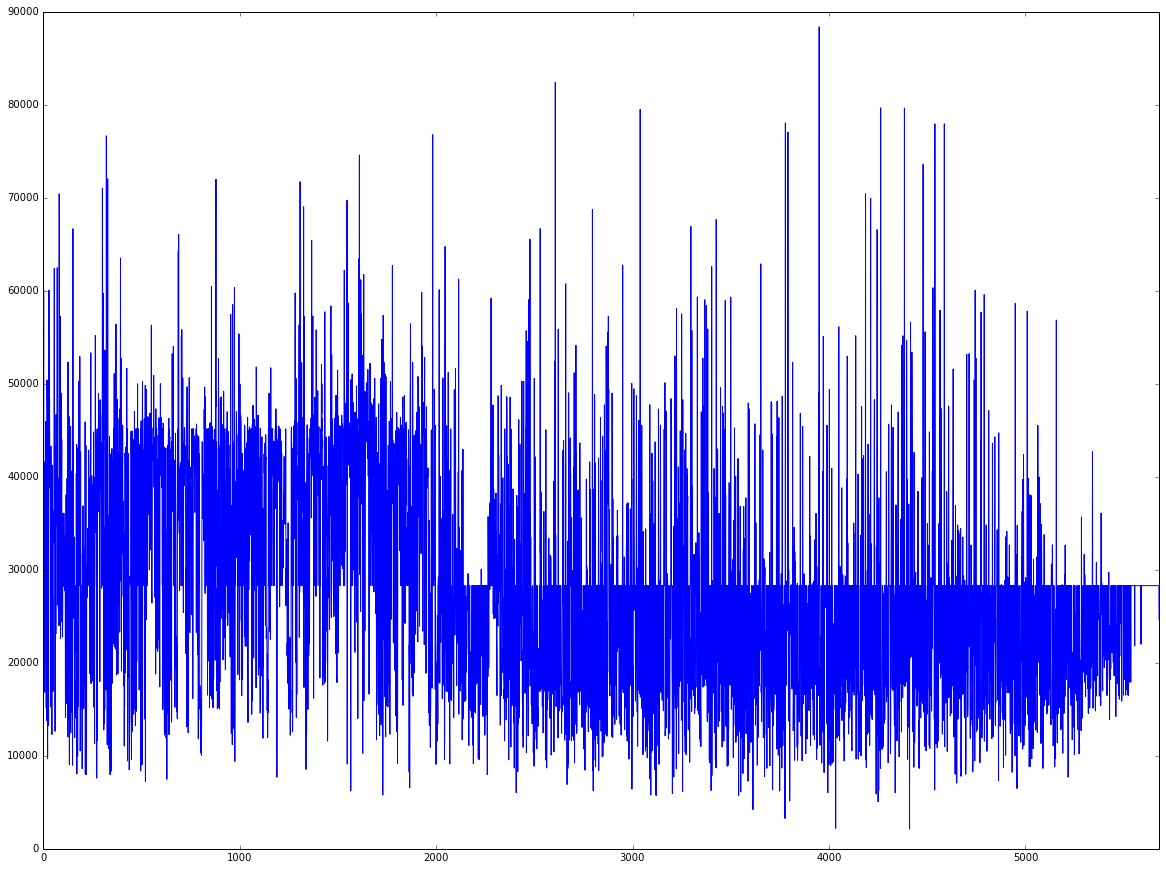

In [78]:
#plot 2021 Debt
Debt_features5["GRAD_DEBT_MDN_2021"].plot(figsize=(20,15));

In [81]:
pd_sql.to_sql(df, "College-data", con) 

ValueError: Table 'College-data' already exists.